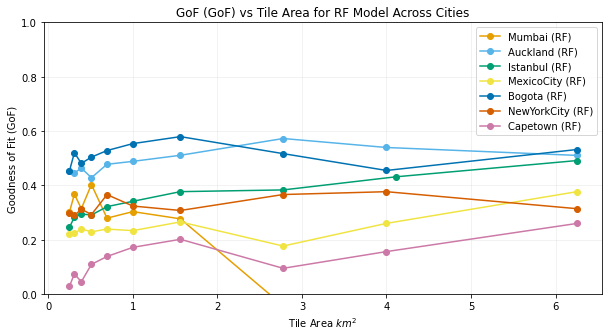

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load and prepare your data
def load_data(file_path):
    df = pd.read_csv(file_path, header=None, sep=" ")
    df.columns = ["congtype", "City", "Scale", "Model", "GoF", "R2"]
    return df

# Process files
files = ['NONRECURRENTFigure1city' + str(x) + '.csv' for x in range(2, 9)]  # City indices from 2 to 8

all_data = pd.concat([load_data(f) for f in files])

# Calculate tile area with specific condition for Istanbul
def calculate_tile_area(row):
    base = 75 if row['City'] == 'Istanbul' else 50
    return (base / row['Scale'])**2

all_data['TileArea'] = all_data.apply(calculate_tile_area, axis=1)

# Color-blind friendly palette for seven cities
colors = {
    "Mumbai": "#E69F00",  # orange
    "Auckland": "#56B4E9",    # sky blue
    "Istanbul": "#009E73",    # bluish green
    "MexicoCity": "#F0E442",  # yellow
    "Bogota": "#0072B2",      # blue
    "NewYorkCity": "#D55E00", # vermilion
    "Capetown": "#CC79A7",    # reddish purple
}

# Plotting function for each model type with lines for each city
def plot_data_by_model(df, model_types, city_list):
    for model in model_types:
        plt.figure(figsize=(10, 5))
        for city in city_list:
            subset = df[(df['City'] == city) & (df['Model'] == model)]
            subset = subset.sort_values(by='TileArea')
            if not subset.empty:
                plt.plot(subset['TileArea'], subset['GoF'], marker='o', linestyle='-', label=f"{city} ({model})", color=colors[city])
        
        plt.title(f'GoF (GoF) vs Tile Area for {model} Model Across Cities')
        plt.xlabel(r'Tile Area $km^2$')
        plt.ylabel('Goodness of Fit (GoF)')
        plt.grid(True, alpha=0.2)
        plt.legend()
        plt.ylim(0,1)
        plt.show()

# Example usage
city_list = ["Mumbai", "Auckland", "Istanbul", "MexicoCity", "Bogota", "NewYorkCity", "Capetown"]
model_types = ['RF'] # , 'LR', 'RLR', 'GBM']

plot_data_by_model(all_data, model_types, city_list)


RECURRENTFigure1city2.csv
RECURRENTFigure1city3.csv
RECURRENTFigure1city4.csv
RECURRENTFigure1city5.csv
RECURRENTFigure1city6.csv
RECURRENTFigure1city7.csv
RECURRENTFigure1city8.csv


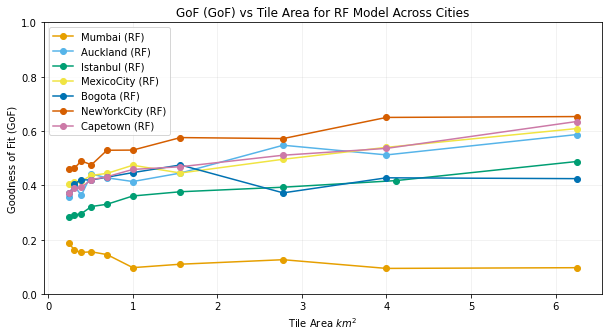

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load and prepare your data
def load_data(file_path):
    print (file_path)
    df = pd.read_csv(file_path, header=None, sep=" ")
    df.columns = ["congtype", "City", "Scale", "Model", "GoF", "R2"]
    return df

# Process files
files = ['RECURRENTFigure1city' + str(x) + '.csv' for x in [2,3,4,5,6,7,8]]  # City indices from 2 to 8

all_data = pd.concat([load_data(f) for f in files])

# Calculate tile area with specific condition for Istanbul
def calculate_tile_area(row):
    base = 75 if row['City'] == 'Istanbul' else 50
    return (base / row['Scale'])**2

all_data['TileArea'] = all_data.apply(calculate_tile_area, axis=1)

# Color-blind friendly palette for seven cities
colors = {
    "Mumbai": "#E69F00",  # orange
    "Auckland": "#56B4E9",    # sky blue
    "Istanbul": "#009E73",    # bluish green
    "MexicoCity": "#F0E442",  # yellow
    "Bogota": "#0072B2",      # blue
    "NewYorkCity": "#D55E00", # vermilion
    "Capetown": "#CC79A7",    # reddish purple
}

# Plotting function for each model type with lines for each city
def plot_data_by_model(df, model_types, city_list):
    for model in model_types:
        plt.figure(figsize=(10, 5))
        for city in city_list:
            subset = df[(df['City'] == city) & (df['Model'] == model)]
            subset = subset.sort_values(by='TileArea')
            if not subset.empty:
                plt.plot(subset['TileArea'], subset['GoF'], marker='o', linestyle='-', label=f"{city} ({model})", color=colors[city])
        
        plt.title(f'GoF (GoF) vs Tile Area for {model} Model Across Cities')
        plt.xlabel(r'Tile Area $km^2$')
        plt.ylabel('Goodness of Fit (GoF)')
        plt.grid(True, alpha=0.2)
        plt.legend()
        plt.ylim(0,1)
        plt.show()

# Example usage
city_list = ["Mumbai", "Auckland", "Istanbul", "MexicoCity", "Bogota", "NewYorkCity", "Capetown"]
model_types = ['RF'] # , 'LR', 'RLR', 'GBM']

plot_data_by_model(all_data, model_types, city_list)


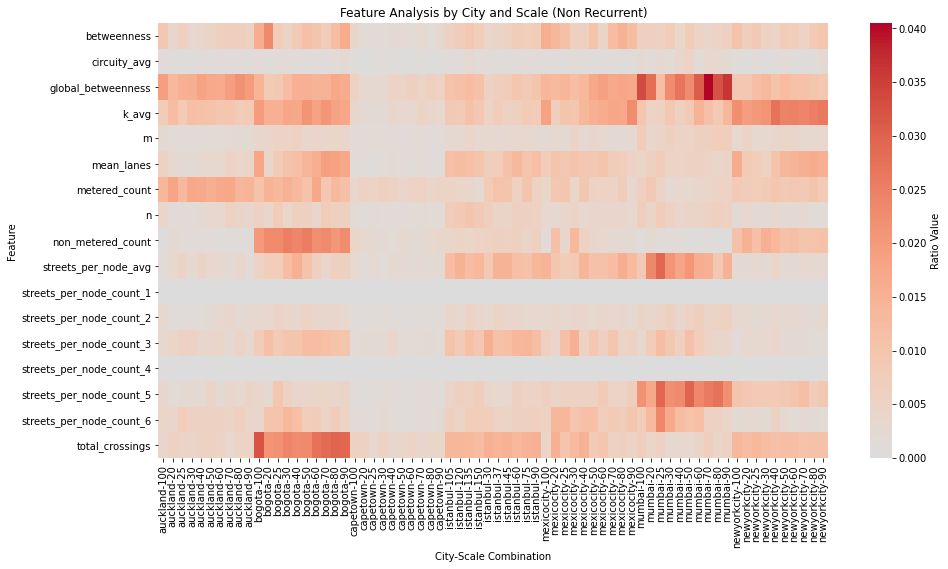

In [28]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load and prepare your data
def load_data(file_path):
    df = pd.read_csv(file_path, delim_whitespace=True, header=None)
    df.columns = ["marker", "City-Scale-tod", "feature", "absshap"]
    split_columns = df['City-Scale-tod'].str.split('-', expand=True)
    df['City'] = split_columns[3]
    df['Scale'] = split_columns[4].astype(int)
    # Concatenate City and Scale into a single column
    df['City-Scale'] = df['City'] + '-' + df['Scale'].astype(str)
    return df

# Process files
files = ['NONRECURRENTFigure2city' + str(x) + '.csv' for x in range(2, 9)]  # City indices from 2 to 8

all_data = pd.concat([load_data(f) for f in files])

# Pivot data for heatmap
heatmap_data = all_data.pivot_table(index='feature', columns='City-Scale', values='absshap', aggfunc='mean')

# Plotting the heatmap
plt.figure(figsize=(15, 8))
sns.heatmap(heatmap_data, annot=False, cmap="coolwarm", center=0, cbar_kws={'label': 'Ratio Value'}, 
            yticklabels=True, xticklabels=True)
plt.title("Feature Analysis by City and Scale (Non Recurrent)")
plt.ylabel("Feature")
plt.xlabel("City-Scale Combination")
plt.show()


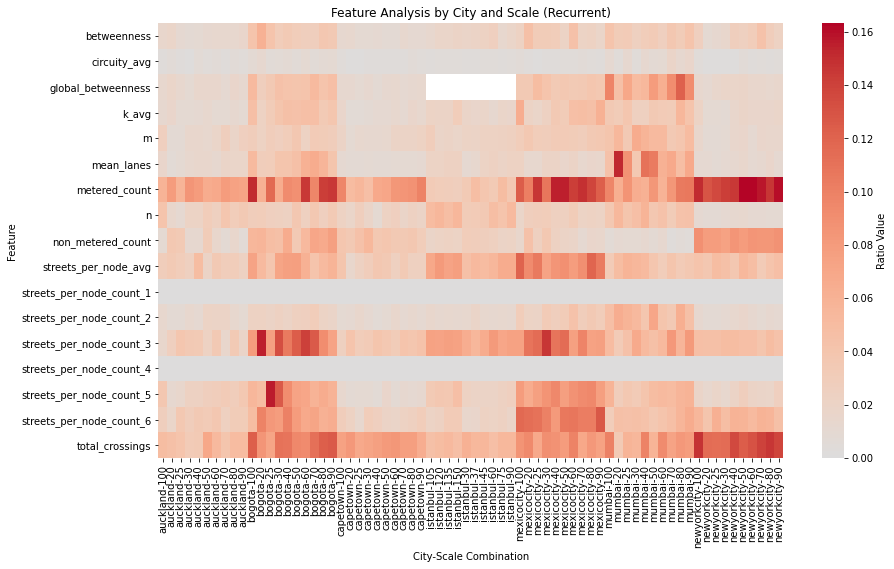

In [29]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load and prepare your data
def load_data(file_path):
    df = pd.read_csv(file_path, delim_whitespace=True, header=None)
    df.columns = ["marker", "City-Scale-tod", "feature", "absshap"]
    split_columns = df['City-Scale-tod'].str.split('-', expand=True)
    df['City'] = split_columns[1]
    df['Scale'] = split_columns[2].astype(int)
#     df['Scale'] = df['Scale'].apply(lambda x: x.zfill(3))    
    # Concatenate City and Scale into a single column
    df['City-Scale'] = df['City'] + '-' + df['Scale'].astype(str)
    return df

# Process files
files = ['RECURRENTFigure2city' + str(x) + '.csv' for x in [2,3,4,5,6,7,8]]  # City indices from 2 to 8

all_data = pd.concat([load_data(f) for f in files])

# Pivot data for heatmap
heatmap_data = all_data.pivot_table(index='feature', columns='City-Scale', values='absshap', aggfunc='mean')

# Plotting the heatmap
plt.figure(figsize=(14, 8))
sns.heatmap(heatmap_data, annot=False, cmap="coolwarm", center=0, cbar_kws={'label': 'Ratio Value'}, 
            yticklabels=True, xticklabels=True)
plt.title("Feature Analysis by City and Scale (Recurrent)")
plt.ylabel("Feature")
plt.xlabel("City-Scale Combination")
plt.show()


NONRECURRENTFigure3city2.csv
NONRECURRENTFigure3city3.csv
NONRECURRENTFigure3city4.csv
NONRECURRENTFigure3city5.csv
NONRECURRENTFigure3city6.csv
NONRECURRENTFigure3city7.csv
NONRECURRENTFigure3city8.csv


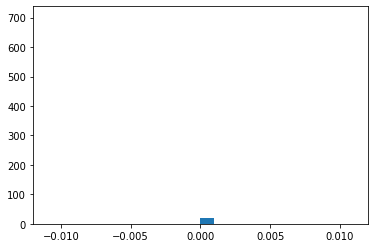

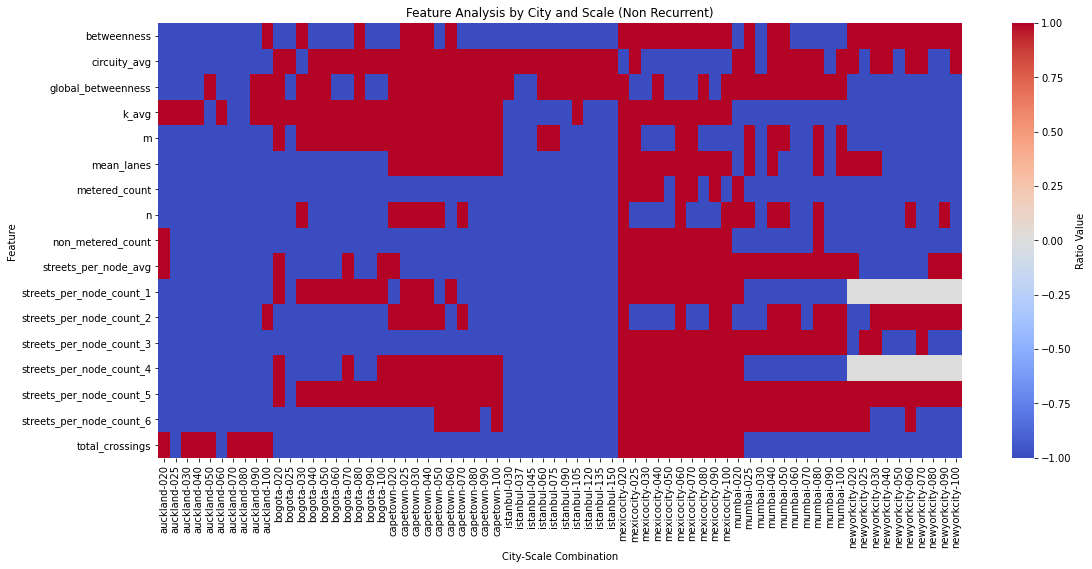

In [40]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load and prepare your data
def load_data(file_path):
    print (file_path)
    df = pd.read_csv(file_path, delim_whitespace=True, header=None)
    df.columns = ["garbage" + str(x) for x in [0,1,2,3,4,5,6,7,8]] + ["City-Scale-tod", "garbage7", "feature", "ratio", "num", "den"]
    split_columns = df['City-Scale-tod'].str.split('-', expand=True)
    df['City'] = split_columns[3]
    df['Scale'] = split_columns[4].astype(str)
    df['Scale'] = df['Scale'].apply(lambda x: x.zfill(3))
#     Concatenate City and Scale into a single column
    df['City-Scale'] = df['City'] + '-' + df['Scale'].astype(str)
    df["signeddenominator"] =  np.sign(df['ratio']) # * df["num"] / df["den"]
#     df["ratio"] = df["ratio"] * 10000
    return df

# Process files
files = ['NONRECURRENTFigure3city' + str(x) + '.csv' for x in range(2, 9)]  # City indices from 2 to 8

all_data = pd.concat([load_data(f) for f in files])

# Pivot data for heatmap
heatmap_data = all_data.pivot_table(index='feature', columns='City-Scale', values='signeddenominator', aggfunc='mean')
plt.hist(heatmap_data.to_numpy().flatten().tolist(), bins=2000)
plt.xlim(-0.012, 0.012)
plt.show()

heatmap_data = heatmap_data.clip(-500, 500)

# Plotting the heatmap
plt.figure(figsize=(18, 8))
sns.heatmap(heatmap_data, annot=False, cmap="coolwarm", center=0, cbar_kws={'label': 'Ratio Value'}, 
            yticklabels=True, xticklabels=True)
plt.title("Feature Analysis by City and Scale (Non Recurrent)")
plt.ylabel("Feature")
plt.xlabel("City-Scale Combination")
plt.show()



In [128]:
heatmap_data.clip(-0.5, 0.5)

City-Scale                auckland-100  auckland-20  auckland-25  auckland-30  \
feature                                                                         
betweenness                   0.012953    -0.000532    -0.000388    -0.000635   
circuity_avg                 -0.000111    -0.000164    -0.000759    -0.000086   
global_betweenness            0.001737    -0.005077    -0.010905    -0.006683   
k_avg                         0.000384     0.003861     0.001053     0.002272   
m                            -0.000088    -0.000257    -0.000192    -0.000061   
mean_lanes                   -0.000103    -0.000239    -0.000088    -0.000105   
metered_count                -0.000852    -0.004760    -0.002093    -0.003315   
n                             0.004583    -0.000144    -0.000418    -0.000154   
non_metered_count            -0.000006    -0.001101    -0.000302    -0.000067   
streets_per_node_avg         -0.000024    -0.000912    -0.000635    -0.001116   
streets_per_node_count_1      0.000000     0.000000     0.000000     0.000000   
streets_per_node_count_2      0.000400    -0.000175    -0.000231    -0.000190   
streets_per_node_count_3     -0.000057    -0.001055    -0.000482    -0.001161   
streets_per_node_count_4      0.000000     0.000000     0.000000     0.000000   
streets_per_node_count_5     -0.000507    -0.000217    -0.000089    -0.000133   
streets_per_node_count_6     -0.000090    -0.000413    -0.000616    -0.001916   
total_crossings               0.000198     0.002573    -0.037746     0.000823   

City-Scale                auckland-40  auckland-50  auckland-60  auckland-70  \
feature                                                                        
betweenness                 -0.000853    -0.001362    -0.000355    -0.000343   
circuity_avg                -0.000066    -0.000032    -0.000081    -0.000026   
global_betweenness          -0.002944    -0.016895    -0.022586     0.045915   
k_avg                        0.001834     0.002955     0.002610    -0.010217   
m                           -0.000081    -0.000031    -0.000052    -0.000039   
mean_lanes                  -0.000078    -0.000055    -0.000083    -0.000144   
metered_count               -0.001445    -0.001417    -0.000661    -0.000845   
n                           -0.000135     0.000652    -0.000636    -0.001296   
non_metered_count           -0.000206    -0.000082    -0.000018    -0.000008   
streets_per_node_avg        -0.000439    -0.000286    -0.000133    -0.000096   
streets_per_node_count_1     0.000000     0.000000     0.000000     0.000000   
streets_per_node_count_2    -0.000101    -0.000130    -0.000687    -0.000414   
streets_per_node_count_3    -0.000255    -0.000179    -0.000203    -0.000050   
streets_per_node_count_4     0.000000     0.000000     0.000000     0.000000   
streets_per_node_count_5    -0.000117     0.000730    -0.000092    -0.005701   
streets_per_node_count_6    -0.000464    -0.000243    -0.000234    -0.000099   
total_crossings              0.000752     0.000687    -0.004766     0.000189   

City-Scale                auckland-80  auckland-90  ...  newyorkcity-100  \
feature                                             ...                    
betweenness                 -0.000367    -0.000201  ...         0.000116   
circuity_avg                -0.000025    -0.000017  ...         0.000060   
global_betweenness          -0.003198     0.001709  ...        -0.000243   
k_avg                       -0.000481     0.001021  ...        -0.000374   
m                           -0.000048    -0.000043  ...        -0.000014   
mean_lanes                  -0.000058    -0.000067  ...        -0.000120   
metered_count               -0.000523    -0.000714  ...        -0.000054   
n                           -0.000235     0.003388  ...        -0.000022   
non_metered_count           -0.000014    -0.000006  ...        -0.000034   
streets_per_node_avg        -0.000099    -0.000042  ...         0.000387   
streets_per_node_count_1   

In [37]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load and prepare your data
def load_data(file_path):
    df = pd.read_csv(file_path, delim_whitespace=True, header=None)
    df.columns = ["garbage" + str(x) for x in [0,1,2,3,4,5,6]] + ["City-Scale-tod", "garbage7", "feature", "ratio"]
    split_columns = df['City-Scale-tod'].str.split('-', expand=True)
    df['City'] = split_columns[3]
    df['Scale'] = split_columns[4].astype(int)
    # Concatenate City and Scale into a single column
    df['City-Scale'] = df['City'] + '-' + df['Scale'].astype(str)
    df["ratio"] = df["ratio"] * 10000
    return df

# Process files
files = ['NONRECURRENTFigure3city' + str(x) + '.csv' for x in range(2, 9)]  # City indices from 2 to 8

all_data = pd.concat([load_data(f) for f in files])

# Pivot data for heatmap
heatmap_data = all_data.pivot_table(index='feature', columns='City-Scale', values='ratio', aggfunc='mean')

# Plotting the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, annot=False, cmap="coolwarm", center=0, cbar_kws={'label': 'Ratio Value'})
plt.title("Feature Analysis by City and Scale (Non Recurrent)")
plt.ylabel("Feature")
plt.xlabel("City-Scale Combination")
plt.show()


ValueError: Length mismatch: Expected axis has 15 elements, new values have 11 elements